In [1]:
CUDA_LAUNCH_BLOCKING="1"
import pandas as pd
from pathlib import Path
import matplotlib.cm as cm
from fastai import *
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *
import numpy as np
from pathlib import Path
from typing import *
import torch
import torch.optim as optim
from transformers import *

In [2]:
'''FAST AI - BERT'''



class Configuracao(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)



config = Configuracao(
    testing=False,
    bert_model_name="bert-base-multilingual-cased",
    max_lr=1e-4,
    epochs=4,#12
    use_fp16=False,
    batch_size=400,
    bs=64,
    discriminative=True,
    max_seq_len=128,
)

class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=1.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()
    
    
from pytorch_pretrained_bert import BertTokenizer

bert_token = BertTokenizer.from_pretrained(
    config.bert_model_name,
)

class FastAiBertTokenizer(BaseTokenizer):
    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int=128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len
    def __call__(self, *args, **kwargs):
        return self
    def tokenizer(self, t:str) -> List[str]:
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

fastai_tokenizer = Tokenizer(tok_func=FastAiBertTokenizer(bert_token, max_seq_len=config.max_seq_len), pre_rules=[], post_rules=[])

fastai_bert_vocab = Vocab(list(bert_token.vocab.keys()))

print(fastai_bert_vocab)

torch.cuda.is_available()


The pre-trained model you are loading is a cased model but you have not set `do_lower_case` to False. We are setting `do_lower_case=False` for you but you may want to check this behavior.


True

In [3]:

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig

MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer, BertConfig),
    'xlnet': (XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig),
    'xlm': (XLMForSequenceClassification, XLMTokenizer, XLMConfig),
    'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig),
    'distilbert': (DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig)}
    
model_type = 'bert'

model_class, tokenizer_class, config_class = MODEL_CLASSES[model_type]

In [4]:
path_controle='/home/rubens/Controle/json'
path_escuro='/home/rubens/Escuro/json'
import os
import sys

import io

In [5]:
controle=[]
dados_controle=[]
for filename in os.listdir(path_controle):
    controle.append(filename[0:-5])
    try:
        with io.open(path_controle+'/'+filename,'r',encoding='utf-8') as f:
            data = json.load(f)
            dados_controle.append(data)
    except:
        dados_controle.append([])
    print(filename,len(controle))

escuro=[]
dados_escuro=[]
for filename2 in os.listdir(path_escuro):
    escuro.append(filename2[0:-5])
    try:
        with io.open(path_escuro+'/'+filename2,'r',encoding='utf-8') as f2:
            data2 = json.load(f2)
            dados_escuro.append(data2)
    except:
        dados_escuro.append([])
    print(filename2,len(escuro))


12732_24122019_79129862272_92993559018_Parte1.json 1
12732_13112019_72463708387_99991849127_Parte1.json 2
12732_30112019_89148380563_71996344746_Parte1.json 3
12732_27112019_11185652663_31995968230_Parte1.json 4
12732_05122019_06452261576_79999448827_Parte1.json 5
12732_29112019_20766483487_82982032015_Parte1.json 6
12732_26122019_33905960893_11961995939_Parte1.json 7
12732_08112019_37727538841_11974682188_Parte1.json 8
12732_12112019_84696648400_81982286733_Parte1.json 9
12732_13112019_63868806091_51992380297_Parte1.json 10
12732_04122019_03896983180_66996901388_Parte1.json 11
12732_11012020_34378510200_92992321868_Parte1.json 12
12732_16122019_09461774494_81971129483_Parte1.json 13
12732_30102019_09929493603_32999770083_Parte1.json 14
12732_05122019_02026794383_85981518923_Parte1.json 15
12732_28122019_47568030830_71999066941_Parte1.json 16
12732_07112019_00130285374_98991434943_Parte1.json 17
12732_05112019_97910783353_98991302440_Parte1.json 18
12732_30122019_00216982790_2299994534

12732_04112019_17136965764_21998712925_Parte1.json 157
12732_12122019_51488043515_73998131835_Parte1.json 158
12732_23122019_11455722782_27997502076_Parte1.json 159
12732_27112019_06620009271_94991626215_Parte1.json 160
12732_13012020_07775426411_81981219710_Parte1.json 161
12732_11122019_39612159874_13996756138_Parte1.json 162
12732_12112019_35383940839_11930695621_Parte1.json 163
12732_24122019_86516524530_75999962950_Parte1.json 164
12732_13112019_83107193372_47992848191_Parte1.json 165
12732_17122019_12472508654_33999825908_Parte1.json 166
12732_14112019_01641118164_66999825558_Parte1.json 167
12732_11122019_01166253848_18996520430_Parte1.json 168
12732_11122019_04364876674_32998408640_Parte1.json 169
12732_04112019_59869402615_31998231652_Parte1.json 170
12732_17122019_00146263731_27997057164_Parte1.json 171
12732_12122019_70846283204_53999961659_Parte1.json 172
12732_24122019_69496773249_91991491873_Parte1.json 173
12732_24122019_62795092301_86981601165_Parte1.json 174
12732_2311

12732_29112019_55457193268_93992093289_Parte1.json 316
12732_12122019_38245179817_11930250329_Parte1.json 317
12732_27112019_54287669053_53999003373_Parte1.json 318
12732_29102019_59692006620_35992151508_Parte1.json 319
12732_12122019_11051351871_15997441767_Parte1.json 320
12732_25112019_27490587832_11944524096_Parte1.json 321
12732_27092019_86623591915_11942322680_Parte1.json 322
12732_11122019_06747842600_35999402207_Parte1.json 323
12732_12122019_06885585505_27995213735_Parte1.json 324
12732_24122019_91567742572_74999738923_Parte1.json 325
12732_12122019_64143481553_34999222155_Parte1.json 326
12732_13122019_24178969315_85982149819_Parte1.json 327
12732_05122019_14793890210_95991295886_Parte1.json 328
12732_13112019_91048389200_92992841244_Parte1.json 329
12732_13122019_49968130753_11964071333_Parte1.json 330
12732_17122019_03118425261_97991823035_Parte1.json 331
12732_13112019_78241804253_91991665625_Parte1.json 332
12732_24122019_69825254904_41991824686_Parte1.json 333
12732_1212

12732_04122019_12046024419_82982175577_Parte1.json 469
12732_06122019_16507124800_17997064802_Parte1.json 470
12732_24122019_05808558646_31996430880_Parte1.json 471
12732_30112019_34966863830_33998302602_Parte1.json 472
12732_05112019_03293534627_34998120065_Parte1.json 473
12732_18112019_06927976108_67996455983_Parte1.json 474
12732_12122019_95599878791_21995204662_Parte1.json 475
12732_29102019_63426284324_98991087122_Parte1.json 476
12732_24122019_82254591720_21972096035_Parte1.json 477
12732_27112019_40614646120_34998051611_Parte1.json 478
12732_24122019_81182554687_35999594533_Parte1.json 479
12732_12122019_08266545685_31971520913_Parte1.json 480
12732_12122019_09075152663_31996857120_Parte1.json 481
12732_02012020_01271721813_11996935369_Parte1.json 482
12732_03122019_03768345289_97991404840_Parte1.json 483
12732_13112019_02110427655_33999998917_Parte1.json 484
12732_06122019_07755243524_77998014593_Parte1.json 485
12732_23112019_38703723895_11941641321_Parte1.json 486
12732_1811

12732_29102019_78183049753_27996170314_Parte1.json 625
12732_09122019_28647505468_19997263824_Parte1.json 626
12732_08012020_88745694087_51997020633_Parte1.json 627
12732_13112019_08778926602_31995929595_Parte1.json 628
12732_04122019_18813846754_22997540815_Parte1.json 629
12732_22112019_04639437595_77999323393_Parte1.json 630
12732_18112019_86546819503_75998249178_Parte1.json 631
12732_04122019_04933381607_51995638681_Parte1.json 632
12732_27112019_10285098632_33998184257_Parte1.json 633
12732_04122019_08301315660_35999643340_Parte1.json 634
12732_29102019_66046530059_51998197984_Parte1.json 635
12732_24122019_86320033800_16997277554_Parte1.json 636
12732_29102019_59702770106_64996125296_Parte1.json 637
12732_11122019_60114743304_88981337919_Parte1.json 638
12732_24122019_91040701515_73998162022_Parte1.json 639
12732_13112019_80211453234_96991310249_Parte1.json 640
12732_13112019_61074397304_99991514412_Parte1.json 641
12732_06112019_11417295473_87981155660_Parte1.json 642
12732_2811

12732_13112019_91132630568_15996473129_Parte1.json 790
12732_22112019_04056188599_73998206527_Parte1.json 791
12732_19112019_09993111660_35998517650_Parte1.json 792
12732_29102019_62259288200_92993766530_Parte1.json 793
12732_13112019_94039950682_31999472235_Parte1.json 794
12732_30102019_06273595402_82982319168_Parte1.json 795
12732_22112019_52571527894_11972318037_Parte1.json 796
12732_24122019_86269698561_75998895243_Parte1.json 797
12732_29102019_70106756273_51996602196_Parte1.json 798
12732_04122019_07498213370_88981384721_Parte1.json 799
12732_13112019_86137360334_88981461673_Parte1.json 800
12732_04122019_03666606245_92993893848_Parte1.json 801
12732_22112019_03772283110_67998146456_Parte1.json 802
12732_13112019_87578050753_22999713904_Parte1.json 803
12732_30112019_25913920805_11930782571_Parte1.json 804
12732_03122019_02919828673_33999782276_Parte1.json 805
12732_05122019_03090840405_21967408117_Parte1.json 806
12732_24122019_77589319600_38999240426_Parte1.json 807
12732_0212

12732_13122019_20896549372_85981225497_Parte1.json 940
12732_13012020_03721429150_67996571572_Parte1.json 941
12732_12122019_05032349585_77999749798_Parte1.json 942
12732_03122019_78816165391_88981564543_Parte1.json 943
12732_17122019_70727245406_84981271295_Parte1.json 944
12732_18122019_04319589041_54999176946_Parte1.json 945
12732_12122019_30348755848_11932945176_Parte1.json 946
12732_24122019_73119717649_35998057840_Parte1.json 947
12732_13122019_05360150157_64999643121_Parte1.json 948
12732_18112019_09443219840_11998518443_Parte1.json 949
12732_05112019_99318237472_81981978938_Parte1.json 950
12732_14122019_01577375009_51998112413_Parte1.json 951
12732_13112019_52319433805_11997124390_Parte1.json 952
12732_05112019_93557590100_75999382405_Parte1.json 953
12732_12092019_28630942894_81999969369_Parte1.json 954
12732_11122019_07114876858_12997540724_Parte1.json 955
12732_10122019_00824233263_91991273391_Parte1.json 956
12732_24122019_87680386820_11934102565_Parte1.json 957
12732_1212

12732_13112019_70673834204_92991407478_Parte1.json 1095
12732_09012020_84435976234_92993525070_Parte1.json 1096
12732_13112019_73764744804_12996023190_Parte1.json 1097
12732_12122019_05789467423_79999678632_Parte1.json 1098
12732_13112019_70677088264_92994195995_Parte1.json 1099
12732_23122019_15959559765_21997601077_Parte1.json 1100
12732_14122019_05674381550_74999597072_Parte1.json 1101
12732_01112019_02980894915_48991553853_Parte1.json 1102
12732_14112019_01074004728_21967222069_Parte1.json 1103
12732_12122019_11152258710_21996882335_Parte1.json 1104
12732_09122019_83018123620_32999224975_Parte1.json 1105
12732_27112019_04765063364_98991021552_Parte1.json 1106
12732_12122019_00460353039_51980434634_Parte1.json 1107
12732_10012020_15212312817_16997216675_Parte1.json 1108
12732_13112019_77563514449_87981059457_Parte1.json 1109
12732_05122019_04129819801_14997824141_Parte1.json 1110
12732_11122019_40136237819_11933868188_Parte1.json 1111
12732_13112019_92322662534_71999928140_Parte1.js

12732_22112019_00510005209_92992325920_Parte1.json 1243
12732_26112019_01939376033_51995739265_Parte1.json 1244
12732_11122019_43887947835_11933915747_Parte1.json 1245
12732_13112019_76928969091_55996774249_Parte1.json 1246
12732_29102019_78438594204_92994899740_Parte1.json 1247
12732_30112019_00882122207_93991923633_Parte1.json 1248
12732_24122019_98403087691_34998332806_Parte1.json 1249
12732_23122019_00563636645_33999958402_Parte1.json 1250
12732_12112019_16440266861_15998292990_Parte1.json 1251
12732_22112019_03098722860_15998226713_Parte1.json 1252
12732_13112019_11260543722_21997923795_Parte1.json 1253
12732_05112019_92405460300_88981441168_Parte1.json 1254
12732_03122019_29994421816_14997215561_Parte1.json 1255
12732_18112019_03184491889_12996470712_Parte1.json 1256
12732_05112019_03208202628_31999352674_Parte1.json 1257
12732_18112019_12092704630_38998140189_Parte1.json 1258
12732_10122019_77228464249_91992674011_Parte1.json 1259
12732_18112019_00831043210_92991112666_Parte1.js

12732_27112019_07149711545_71996813476_Parte1.json 1406
12732_13112019_86480999517_71999007847_Parte1.json 1407
12732_18112019_94639779020_51997503942_Parte1.json 1408
12732_29102019_61060158302_89981463187_Parte1.json 1409
12732_18122019_10773737677_31998379211_Parte1.json 1410
12732_13112019_75641224553_74999173022_Parte1.json 1411
12732_24122019_77663543904_49991367148_Parte1.json 1412
12732_28112019_00051970740_21995368175_Parte1.json 1413
12732_07122019_02624950079_51999704187_Parte1.json 1414
12732_18102019_03622113294_91992508446_Parte1.json 1415
12732_31102019_07514671897_11956546689_Parte1.json 1416
12732_18112019_99296659272_92992673118_Parte1.json 1417
12732_22112019_03642189830_17996485914_Parte1.json 1418
12732_18112019_78248213234_91992453017_Parte1.json 1419
12732_18112019_03022116594_75999189675_Parte1.json 1420
12732_02122019_17097385707_22998448852_Parte1.json 1421
12732_13112019_87742896168_66999841981_Parte1.json 1422
12732_29112019_32365459846_11950879202_Parte1.js

12732_27112019_43872727753_21999373886_Parte1.json 1554
12732_11122019_60474890600_17997389742_Parte1.json 1555
12732_02122019_41289839859_17996641923_Parte1.json 1556
12732_18112019_06591519874_11972597044_Parte1.json 1557
12732_13122019_05566822380_88981043992_Parte1.json 1558
12732_11122019_96924349234_92995040210_Parte1.json 1559
12732_08112019_11480206750_21971766469_Parte1.json 1560
12732_13112019_80437141772_22999763783_Parte1.json 1561
12732_04122019_97381799804_65998110549_Parte1.json 1562
12732_13122019_95161430087_51999893825_Parte1.json 1563
12732_13112019_79453821187_62998653704_Parte1.json 1564
12732_22112019_07112423562_77999632037_Parte1.json 1565
12732_19112019_34472789949_48991302520_Parte1.json 1566
12732_29102019_70671985264_95991181282_Parte1.json 1567
12732_04122019_13471760636_35997595960_Parte1.json 1568
12732_29102019_61342210310_98991896372_Parte1.json 1569
12732_05112019_17074704725_21972565902_Parte1.json 1570
12732_11122019_12364603838_11933919028_Parte1.js

12732_12122019_30394791800_11942150786_Parte1.json 1717
12732_24122019_81475101287_91992434410_Parte1.json 1718
12732_29112019_16106697892_11933580884_Parte1.json 1719
12732_22112019_00233640339_84981284540_Parte1.json 1720
12732_03012020_60257541012_51995929319_Parte1.json 1721
12732_10012020_03246960518_75998090901_Parte1.json 1722
12732_14112019_35383940839_11943159765_Parte1.json 1723
12732_07112019_08977264804_16996235103_Parte1.json 1724
12732_29102019_78323134553_71996939963_Parte1.json 1725
12732_31102019_52225389829_11973164442_Parte1.json 1726
12732_27112019_45817908832_15998241951_Parte1.json 1727
12732_24122019_81478976420_11943020555_Parte1.json 1728
12732_03122019_14568181801_18996161014_Parte1.json 1729
12732_13112019_84238798872_11942402953_Parte1.json 1730
12732_26112019_03205951883_19996430013_Parte1.json 1731
12732_13012020_12496867760_21971809466_Parte1.json 1732
12732_24122019_86033216555_75998248484_Parte1.json 1733
12732_27112019_05759564455_84981437447_Parte1.js

12732_24122019_70758906200_95991712104_Parte1.json 124
12732_24122019_97106267600_31998384580_Parte1.json 125
12732_08012020_45639685875_16997674705_Parte1.json 126
12732_05122019_06487810622_31997826151_Parte1.json 127
12732_24122019_96208040744_21967547939_Parte1.json 128
12732_09012020_04775826212_91991432012_Parte1.json 129
12732_14102019_06884811595_11963781198_Parte1.json 130
12732_24122019_94251576500_71999215856_Parte1.json 131
12732_29102019_70761680063_51980198795_Parte1.json 132
12732_05122019_15013506840_12996657093_Parte1.json 133
12732_24122019_72434945600_93991040939_Parte1.json 134
12732_18112019_25893632818_12997790270_Parte1.json 135
12732_24122019_66392772200_93991004258_Parte1.json 136
12732_24122019_85573302787_21971746346_Parte1.json 137
12732_10012020_33787302859_14997558960_Parte1.json 138
12732_13092019_16159842757_27996572561_Parte1.json 139
12732_08012020_13784336701_21972110487_Parte1.json 140
12732_24122019_98143280497_83981670842_Parte1.json 141
12732_1112

In [6]:
dados_controle[0]['results'][12]['alternatives'][0]['words'][3]#['word']


{'starttime': {'seconds': 128, 'nanos': 500000000},
 'endtime': {'seconds': 128, 'nanos': 700000000},
 'word': 'sua',
 'confidence': 0.0,
 'speakertag': 0}

In [7]:
import nltk
nltk.download('stopwords')
len(dados_controle)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rubensvectomobile_gmail_com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1750

In [8]:
len(dados_controle[100]['results'][-1]['alternatives'][0]['words'])#[2]['speakertag']
#break -------------- re.sub(r'[^\w\s]','',x)

75

In [9]:
import nltk
import re
import multiprocessing

stopwords = nltk.corpus.stopwords.words('portuguese')

delete2=[i for i in stopwords if len(i)>100]

output=[]

#dados_controle[0]['results'][1]['alternatives'][0]['words'][3]['word']

def clean(parte):
    j0_speaker=[]
    j1_word=[]
    try:
        for m in range(0,len(dados_controle[parte]['results'])):
            for k in range(0,len(dados_controle[parte]['results'][-1]['alternatives'][m]['words'])):
                try:
                    j1_word.append(dados_controle[parte]['results'][-1]['alternatives'][m]['words'][k]['word'])
                    j0_speaker.append(dados_controle[parte]['results'][-1]['alternatives'][m]['words'][k]['speakertag'])

                    cliente=np.array(j1_word)[np.where(np.array(j0_speaker)==1)[0]]
                    atendente=np.array(j1_word)[np.where(np.array(j0_speaker)==2)[0]]
                    cliente_clean=[i for i in cliente if i not in delete2]
                    atendente_clean=[i for i in atendente if i not in delete2]
                    xx=[x for x in cliente_clean]
                    yy=[x for x in atendente_clean]
                    global cliente_clean_ok
                    global atendente_clean_ok
                    cliente_clean_ok=[n for n in xx if not n.isdigit()]
                    atendente_clean_ok=[n for n in yy if not n.isdigit()]
                    aa=np.array([len(cliente_clean_ok),len(atendente_clean_ok)])
                    bb=np.where(aa==np.min(aa))[0]
                    cc=np.where(aa==np.max(aa))[0]
                    dd=np.array([cliente_clean_ok,atendente_clean_ok])
                    cliente_clean_ok=dd[bb]
                    atendente_clean_ok=dd[cc]
                except Exception as e: 
                    print(e)
                    pass
            return cliente_clean_ok,atendente_clean_ok
    except:
        return ['error'],['error']

In [133]:
data = range(0,len(dados_controle))

def mp_handler():
    p = multiprocessing.Pool(64)
    r=p.map(clean,data)
    return r
    
if __name__ == '__main__':
    output.append(mp_handler())
z=output[0]

In [134]:
len(z)

1750

In [135]:
import nltk
import re
import multiprocessing

stopwords = nltk.corpus.stopwords.words('portuguese')

delete2=[i for i in stopwords if len(i)>100]

output=[]

#dados_controle[0]['results'][1]['alternatives'][0]['words'][3]['word']

def clean(parte):
    j0_speaker=[]
    j1_word=[]
    try:
        for m in range(0,len(dados_escuro[parte]['results'])):
            for k in range(0,len(dados_escuro[parte]['results'][-1]['alternatives'][m]['words'])):
                try:
                    j1_word.append(dados_escuro[parte]['results'][-1]['alternatives'][m]['words'][k]['word'])
                    j0_speaker.append(dados_escuro[parte]['results'][-1]['alternatives'][m]['words'][k]['speakertag'])

                    cliente=np.array(j1_word)[np.where(np.array(j0_speaker)==1)[0]]
                    atendente=np.array(j1_word)[np.where(np.array(j0_speaker)==2)[0]]
                    cliente_clean=[i for i in cliente if i not in delete2]
                    atendente_clean=[i for i in atendente if i not in delete2]
                    xx=[x for x in cliente_clean]
                    yy=[x for x in atendente_clean]
                    global cliente_clean_ok
                    global atendente_clean_ok
                    cliente_clean_ok=[n for n in xx if not n.isdigit()]
                    atendente_clean_ok=[n for n in yy if not n.isdigit()]
                    aa=np.array([len(cliente_clean_ok),len(atendente_clean_ok)])
                    bb=np.where(aa==np.min(aa))[0]
                    cc=np.where(aa==np.max(aa))[0]
                    dd=np.array([cliente_clean_ok,atendente_clean_ok])
                    cliente_clean_ok=dd[bb]
                    atendente_clean_ok=dd[cc]
                except Exception as e: 
                    print(e)
                    pass
            return cliente_clean_ok,atendente_clean_ok
    except:
        return ['error'],['error']

In [136]:
data = range(0,len(dados_escuro))

def mp_handler():
    p = multiprocessing.Pool(64)
    r=p.map(clean,data)
    return r
    
if __name__ == '__main__':
    output.append(mp_handler())
z_escuro=output[0]

In [137]:
len(z_escuro)

250

In [138]:
for i in range(0,len(z)):
    print(len(z[i][0][0]),len(z[i][1][0]))

10 358
52 1888
207 1978
9 553
40 1707
0 209
1 218
0 434
0 38
0 642
95 2150
66 184
0 38
46 1408
80 1410
14 1006
0 108
10 1065
1 254
36 799
23 1212
4 219
159 1763
21 1213
136 2705
3 1331
26 1192
3 1366
71 3258
0 114
3 803
54 1638
105 2792
0 432
1 1511
51 2540
43 2435
24 637
23 1555
2 396
0 1114
50 2909
42 702
55 1327
0 375
51 1458
14 417
30 2239
15 248
50 2737
17 940
0 13
52 1340
15 396
115 5782
24 1253
38 436
35 973
69 2108
5 246
0 1390
1 560
0 813
18 317
0 822
73 2620
6 187
19 1217
0 192
0 147
7 107
104 2046
1 395
85 1624
17 347
1 99
22 78
70 2683
9 82
6 627
28 1582
2 9
37 1277
43 1328
19 1019
46 1517
7 469
36 1009
60 1625
0 1964
369 791
40 1605
0 22
64 1377
23 1486
68 2364
64 2358
48 1537
6 106
71 1665
20 55
18 694
0 303
31 1394
3 837
2 200
33 2119
17 1038
10 263
33 1522
3 1398
43 1491
10 380
8 896
47 1661
25 1340
8 253
2 453
48 1428
38 1173
44 1190
31 1596
22 1451
65 1810
29 1332
72 1327
26 1476
71 1292
48 928
7 337
56 1065
0 424
0 2
45 3530
28 1754
28 1325
22 1197
61 2215
88 1467
12

In [113]:
ap1=pd.concat([pd.DataFrame(controle),pd.DataFrame(z)],axis=1)
ap2=pd.concat([pd.DataFrame(escuro),pd.DataFrame(z_escuro)],axis=1)
ap2;

In [ ]:
for i in range(0,ap1.shape[0]):
    ap1.iloc[i,1]=ap1.iloc[i,1][0]
    ap1.iloc[i,2]=ap1.iloc[i,2][0]
for i in range(0,ap2.shape[0]):
    ap2.iloc[i,1]=ap2.iloc[i,1][0]
    ap2.iloc[i,2]=ap2.iloc[i,2][0]
ap1  

In [161]:
#df_controle.to_csv('df_controle11A_ok.csv',sep=';',index=False)
#df_escuro.to_csv('df_escuro11A_ok.csv',sep=';',index=False)

In [7]:
##############################################################################


df_controle=pd.read_csv("df_controle11A_ok.csv",sep=';')
df_escuro=pd.read_csv("df_escuro11A_ok.csv",sep=';', header=0)

In [8]:
#def extract(dados_select,parte):
#    texto=[]
 ##   try:
   #     for i in range(0,len(dados_select[parte]['results'])):
    #        texto.append(dados_select[parte]['results'][i]['alternatives'][0]['transcript'])
    #except:
     #   texto.append([])
    #return texto

In [9]:
#df_controle=ap1
#df_escuro=ap2
df_controle.columns=['chave','cliente','atendente']
df_escuro.columns=['chave','cliente','atendente']
df_escuro

,chave,cliente,atendente
0,12732_29102019_60350008515_77999946313_Parte1,"['Boa', 'tarde', 'eu', 'queria', 'te', 'falar'...","['Oi', 'meu', 'nome', 'é', 'Nicolas,', 'sou', ..."
1,12732_19122019_70239512294_34999502456_Parte1,"['o', 'processo.']","['é', 'só', 'para', 'eu', 'tenho', 'que', 'fin..."
2,12732_24122019_69018553549_73998293343_Parte1,"['Que', 'ótimo', 'graças', 'a', 'Deus', 'foi',...","['Oi', 'bom', 'dia.', 'Oi', 'bom', 'dia,', 'me..."
3,12732_24122019_93803397553_11942165134_Parte1,"['dando', 'um', 'oi.', 'melhor?', 'Olha', 'Ok'...","['Alô,', 'bom', 'dia,', 'meu', 'nome', 'é', 'V..."
4,12732_12112019_86158412503_19997944778_Parte1,"['isso', 'normal?', 'Então', 'vamos', 'jailza....","['tia', 'Meu', 'nome', 'é', 'Bia.', 'Jailson',..."
...,...,...,...
245,12732_06122019_53072211850_11968518241_Parte1,"['eu', 'falo.']","['alô', 'Boa', 'tarde', 'meu', 'nome', 'é', 'K..."
246,12732_13112019_95097597672_38998562706_Parte1,"['pode', 'ser?', 'sua', 'mãe.', 'restante.', '...","['Oi', 'bom', 'dia.', 'Meu', 'nome', 'é', 'Jea..."
247,12732_24122019_65020880663_37999072469_Parte1,"['Alô,', 'bom', 'dia.', 'certo', 'Ótimo', 'do'...","['Meu', 'nome', 'é', 'Taís', 'falou', 'da', 'o..."
248,12732_18122019_69659664915_14998381138_Parte1,"['filme.', 'Falar', 'com', 'noite,', 'eu', 'nã...","['alô', 'para', 'comer', 'fala.', 'O', 'que', ..."


In [10]:
#dataframe_controle=[]

#for xx in range(0,len(dados_controle)):
#    dataframe_controle.append([controle[xx],extract(dados_controle,xx)])
    
#df_controle=pd.DataFrame(dataframe_controle)
#df_controle.columns=['filename','texto']
#df_controle

In [11]:
#dataframe_escuro=[]
#
#for xx in range(0,len(dados_escuro)):
 #   dataframe_escuro.append([escuro[xx],extract(dados_escuro,xx)])
    
#df_escuro=pd.DataFrame(dataframe_escuro)
#df_escuro.columns=['filename','texto']

In [12]:

###### ACERTAR A ORDEM
#######################################################################################


#df_controle=pd.read_csv('df_controle.csv',header=0,sep=';')
#df_escuro=pd.read_csv('df_escuro.csv',header=0,sep=';')

labels=pd.read_excel('Controle_VIKSTAR_Ago_2019_Jan_2020.xlsx')
labels.columns=['chave','classe']

In [13]:
for i in range(0,labels.shape[0]):
    labels.chave[i]=labels.chave[i][0:-4]

In [14]:
np.unique(labels.classe)

array(['AUDIO_ACEITE_INCOMPLETO', 'AUDIO_CAIXA_POSTAL_E_MUDO', 'AUDIO_SEM_ACEITE', 'SEM_RISCO'], dtype=object)

In [15]:
labels.classe.value_counts()

AUDIO_ACEITE_INCOMPLETO      969
AUDIO_SEM_ACEITE             514
SEM_RISCO                    189
AUDIO_CAIXA_POSTAL_E_MUDO     78
Name: classe, dtype: int64

In [16]:
labels.classe[labels.classe=='AUDIO_ACEITE_INCOMPLETO']=1
labels.classe[labels.classe=='AUDIO_CAIXA_POSTAL_E_MUDO']=0
labels.classe[labels.classe=='AUDIO_SEM_ACEITE']=1
labels.classe[labels.classe=='SEM_RISCO']=0
labels.columns=['chave','classe']

In [17]:
labels.classe.value_counts()

1    1483
0     267
Name: classe, dtype: int64

In [ ]:
df_train=pd.merge(labels,df_controle[['chave','cliente','atendente']],how='left',on='chave')
df_train

In [19]:
for i in range(0,df_train.shape[0]):
    df_train.iloc[i,2]=re.sub(r'[^\w\s]','',str(df_train.iloc[i,2]).replace(",", ""))
    df_train.iloc[i,1]=re.sub(r'[^\w\s]','',str(df_train.iloc[i,1]).replace(",", ""))
for i in range(0,df_escuro.shape[0]):
    df_escuro.iloc[i,1]=re.sub(r'[^\w\s]','',str(df_escuro.iloc[i,1]).replace(",", ""))
    df_escuro.iloc[i,2]=re.sub(r'[^\w\s]','',str(df_escuro.iloc[i,2]).replace(",", ""))


In [21]:
#df_controle.to_csv("df_controle_BCKP.csv",columns=df_controle.columns,index=False, sep=';')
#df_escuro.to_csv("df_escuro_BCKP.csv",columns=df_escuro.columns,index=False, sep=';')

In [22]:
#df_train2=df_train

In [23]:
#re.sub(r'[^\w\s]',''

In [24]:
#########################################################

df_train['both']=df_train['cliente'].astype(str)+df_train['atendente'].astype(str)
df_escuro['both']=df_escuro['cliente'].astype(str)+df_escuro['atendente'].astype(str)


In [111]:
from sklearn.model_selection import train_test_split
train0, val0 = train_test_split(df_train,shuffle=True)
train0;

In [ ]:
'df_train both 0.73'
train=train0.iloc[:,[1,4]]
val=val0.iloc[:,[1,4]]
train

test=pd.DataFrame(df_escuro.iloc[:,1])
test.columns=['both']
test

In [28]:
###################################################################################################################

In [29]:

databunch = TextDataBunch.from_df(".", train, val, test,
                  tokenizer=fastai_tokenizer,
                  vocab=fastai_bert_vocab,
                  include_bos=False,
                  include_eos=False,
                  text_cols="both",
                  label_cols=["classe"],
                  bs=config.bs,
                  collate_fn=partial(pad_collate, pad_first=True, pad_idx=0),
             )


class Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = x *(torch.sigmoid(x))
        return x

from pytorch_pretrained_bert.modeling import *
from pytorch_pretrained_bert import *
from sklearn.metrics import classification_report




In [30]:
#configuration = BertConfig(hidden_size=40, num_hidden_layers=4, num_attention_heads=4, hidden_act='gelu',
#                           intermediate_size=35,hidden_dropout_prob=0.1, attention_probs_dropout_prob=0.1, 
#                           max_position_embeddings=512, type_vocab_size=2, initializer_range=0.02,
#                          vocab_size_or_config_json_file=40000)
#modelo = BertForSequenceClassification(configuration,num_labels=2)

In [31]:
modelo = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels=2)

In [32]:
class Concat(nn.Module):
    def __init__(self):
        super().__init__()
        self.x1=nn.Linear(768,768)
        self.x2=modelo.bert.encoder.layer[2].attention.output.dense
    def forward(self, x):
        x = self.x1(x)+self.x2(x)
        return x

In [33]:
#modelo.bert.encoder.layer[11].attention.output.dense=Concat()

In [34]:
modelo.bert.pooler.dense

Linear(in_features=768, out_features=768, bias=True)

In [35]:
modelo.classifier=Sigmoid()

In [36]:
modelo.bert.pooler.activation=modelo.bert.pooler.dense

In [37]:
#loss_func = FocalLoss(alpha=5.,gamma=3.)
learn_data = Learner(
    databunch, modelo,#loss_func = loss_func,
    metrics=[accuracy]
)
#learn_data.model.bert.pooler.activation=Sigmoid()


In [38]:
learn_data.summary()

BertForSequenceClassification
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [128, 768]           91,812,096 True      
______________________________________________________________________
Embedding            [128, 768]           393,216    True      
______________________________________________________________________
Embedding            [128, 768]           1,536      True      
______________________________________________________________________
BertLayerNorm        [128, 768]           1,536      True      
______________________________________________________________________
Dropout              [128, 768]           0          False     
______________________________________________________________________
Linear               [128, 768]           590,592    True      
______________________________________________________________________
Linear               [128, 768]           590,592    True      
________________________________

In [39]:
#learn_data.callbacks.append(ShowGraph(learn_data))
#learn_data.lr_find()

In [40]:
#learn_data.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,6.404680,6.168973,0.525114,00:18


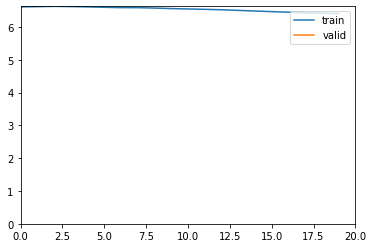

In [41]:
learn_data.callbacks.append(ShowGraph(learn_data))
#learn_data.freeze_to(-5)
learn_data.fit_one_cycle(1, max_lr=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,4.558093,1.880728,0.856164,00:18
1,2.579326,0.560631,0.856164,00:18
2,1.932854,0.497778,0.856164,00:18
3,1.602926,0.414599,0.890411,00:18


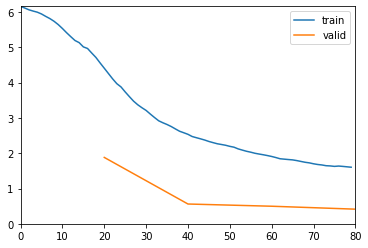

In [42]:
learn_data.callbacks.append(ShowGraph(learn_data))

learn_data.unfreeze()
#learn_data.freeze_to(-10)
learn_data.fit_one_cycle(4, max_lr=1e-4)#,moms=(0.9,0.8))

In [43]:
######################################################################################

In [44]:
#learn_data.unfreeze()
#learn_data.fit_one_cycle(6, max_lr=3e-5)#14


In [45]:
preds, targets = learn_data.get_preds()


In [46]:
predictions = np.argmax(preds, axis=1)
predictions=np.array(predictions)
len(predictions)

438

In [47]:
predictions = np.argmax(preds, axis=1)
predictions=np.array(predictions)
len(predictions)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(np.array(val.iloc[:,0]).astype(int),predictions)


array([[  0,  63],
       [ 15, 360]])

In [48]:
print(classification_report(np.array(val.iloc[:,0]).astype(int),predictions,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.85      0.96      0.90       375

    accuracy                           0.82       438
   macro avg       0.43      0.48      0.45       438
weighted avg       0.73      0.82      0.77       438



In [49]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    """
    the get_preds method does not yield the elements in order by default
    we borrow the code from the RNNLearner to resort the elements into their correct order
    """
    preds = learn_data.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in databunch.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    return preds[reverse_sampler, :]

In [50]:
test_preds = learn_data.get_preds(DatasetType.Test)


In [51]:
###### PAREI AQUI

test_preds[0].shape

torch.Size([250, 768])

In [52]:
test_prevs=np.argmax(test_preds[0],axis=1)

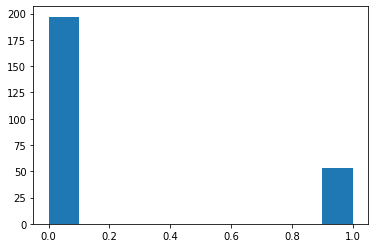

In [53]:
plt.hist(test_prevs)
plt.show()


In [52]:
teste_previsoes=pd.concat([df_escuro.iloc[:,0],pd.DataFrame(test_prevs)],axis=1)
teste_previsoes.columns=['chave','previsao']

In [53]:
teste_previsoes

,chave,previsao
0,12732_29102019_60350008515_77999946313_Parte1,1
1,12732_19122019_70239512294_34999502456_Parte1,0
2,12732_24122019_69018553549_73998293343_Parte1,1
3,12732_24122019_93803397553_11942165134_Parte1,1
4,12732_12112019_86158412503_19997944778_Parte1,0
...,...,...
245,12732_06122019_53072211850_11968518241_Parte1,0
246,12732_13112019_95097597672_38998562706_Parte1,0
247,12732_24122019_65020880663_37999072469_Parte1,0
248,12732_18122019_69659664915_14998381138_Parte1,0


In [54]:

teste_previsoes.to_csv('previsoes_fastai.csv',sep=';',index=False,columns=['chave','previsao'])

In [54]:



#######################################################################################################################
#! pip3 install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets
from transformers import *
from transformers import BertModel, BertConfig
import tensorflow_hub as hub


# Initializing a BERT bert-base-uncased style configuration
configuration = BertConfig(hidden_size=40, num_hidden_layers=4, num_attention_heads=4, hidden_act='gelu',
                           intermediate_size=35,hidden_dropout_prob=0.1, attention_probs_dropout_prob=0.1, 
                           max_position_embeddings=512, type_vocab_size=2, initializer_range=0.02, layer_norm_eps=1e-12)
# Load dataset, tokenizer, model from pretrained model/vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased',max_length=2048)
model0 = TFBertForSequenceClassification(configuration)

#model0 = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased')


In [ ]:
df_train2=df_train.reset_index()
df_train2

In [56]:
train=pd.DataFrame(df_train2.iloc[:,[2,5]])
#val=pd.DataFrame(val0.iloc[:,[1,4]]).reset_index()
#val=val.iloc[:,[1,2]]
#train=train.iloc[:,[1,2]]

In [58]:
for i in range(0,train.shape[0]):
    if train.iloc[i,1]=='[]':
        train.iloc[i,1]='vazio'
    else:
        pass
blind=df_escuro.iloc[:,3]
for i in range(0,len(blind)):
    if blind[i]=='[]':
        blind[i]='vazio'
    else:
        pass

In [59]:
blind=df_escuro.iloc[:,3]
for i in range(0,len(blind)):
    if blind[i]=='[]':
        blind[i]='vazio'
    else:
        pass

In [60]:
for i in range(0,train.shape[0]):
    if train.iloc[i,1]=='[]':
        train.iloc[i,1]='vazio'
    else:
        pass

In [61]:
train2=[]
for i in range(0,train.shape[0]):
    out=tokenizer.encode(train.iloc[i,1])[0:512]
    print(i)
    train2.append(out)
#val2=[]
#for i in range(0,val.shape[0]):
 #   out2=tokenizer.encode(val.iloc[i,1])[0:512]
  #  print(i)
   # val2.append(out2)

Token indices sequence length is longer than the specified maximum sequence length for this model (8243 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7978 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9746 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8702 > 512). Running this sequence through the model will result in indexing errors


0
1
2
3


Token indices sequence length is longer than the specified maximum sequence length for this model (8312 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10615 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4774 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8717 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6401 > 512). Running this sequence through the model will result in indexing errors


4
5
6
7
8


Token indices sequence length is longer than the specified maximum sequence length for this model (6712 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8908 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6234 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10120 > 512). Running this sequence through the model will result in indexing errors


9
10
11
12


Token indices sequence length is longer than the specified maximum sequence length for this model (9402 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6301 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6114 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7165 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6082 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

13
14
15
16
17
18


Token indices sequence length is longer than the specified maximum sequence length for this model (8288 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9885 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7162 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5921 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7359 > 512). Running this sequence through the model will result in indexing errors


19
20
21
22
23


Token indices sequence length is longer than the specified maximum sequence length for this model (6655 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7295 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11272 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8974 > 512). Running this sequence through the model will result in indexing errors


24
25
26
27


Token indices sequence length is longer than the specified maximum sequence length for this model (11235 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7469 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9163 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4718 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6457 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

28
29
30
31
32
33


Token indices sequence length is longer than the specified maximum sequence length for this model (5125 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6140 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7910 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3512 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4775 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

34
35
36
37
38
39


Token indices sequence length is longer than the specified maximum sequence length for this model (5093 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3577 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3380 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1603 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1539 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

40
41
42
43
44
45
46
47
48
49
50


Token indices sequence length is longer than the specified maximum sequence length for this model (7646 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2221 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2558 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5889 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3743 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

51
52
53
54
55
56
57
58
59
60
61


Token indices sequence length is longer than the specified maximum sequence length for this model (3435 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3458 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3708 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2955 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2304 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

62
63
64
65
66
67
68
69
70
71
72


Token indices sequence length is longer than the specified maximum sequence length for this model (3615 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3053 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2996 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1785 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2364 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


Token indices sequence length is longer than the specified maximum sequence length for this model (1260 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1062 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (963 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (874 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1111 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128


Token indices sequence length is longer than the specified maximum sequence length for this model (6958 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1057 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1136 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (836 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (639 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


Token indices sequence length is longer than the specified maximum sequence length for this model (939 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (715 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5697 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1140 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

163
164
165
166
167
168
169
170
171
172
173
174
175
176


Token indices sequence length is longer than the specified maximum sequence length for this model (9407 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3051 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7227 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8968 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

177
178
179
180
181
182
183


Token indices sequence length is longer than the specified maximum sequence length for this model (2071 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1015 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (858 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2285 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2858 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

184
185
186
187
188
189
190
191
192
193
194
195
196
197


Token indices sequence length is longer than the specified maximum sequence length for this model (11318 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2812 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (767 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (980 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (865 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

198
199
200
201
202
203
204
205
206
207
208
209
210
211
212


Token indices sequence length is longer than the specified maximum sequence length for this model (4918 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5937 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7194 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11498 > 512). Running this sequence through the model will result in indexing errors


213
214
215
216


Token indices sequence length is longer than the specified maximum sequence length for this model (7839 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8674 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3188 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1309 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3502 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

217
218
219
220
221
222
223
224


Token indices sequence length is longer than the specified maximum sequence length for this model (11249 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2556 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (890 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1036 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2417 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

225
226
227
228
229
230
231
232
233
234
235
236
237


Token indices sequence length is longer than the specified maximum sequence length for this model (7272 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7974 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8891 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4269 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4141 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

238
239
240
241
242
243


Token indices sequence length is longer than the specified maximum sequence length for this model (8262 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12735 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1422 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8352 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1409 > 512). Running this sequence through the model will result in indexing errors


244
245
246
247
248


Token indices sequence length is longer than the specified maximum sequence length for this model (8803 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1523 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2905 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3180 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2415 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

249
250
251
252
253
254
255


Token indices sequence length is longer than the specified maximum sequence length for this model (12362 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7214 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4123 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6656 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5129 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

256
257
258
259
260
261


Token indices sequence length is longer than the specified maximum sequence length for this model (6853 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8011 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9088 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4419 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5402 > 512). Running this sequence through the model will result in indexing errors


262
263
264
265
266
267


Token indices sequence length is longer than the specified maximum sequence length for this model (6365 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3089 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (820 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3763 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10277 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

268
269
270
271
272
273
274
275


Token indices sequence length is longer than the specified maximum sequence length for this model (6431 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1977 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3134 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4883 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7317 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

276
277
278
279
280
281


Token indices sequence length is longer than the specified maximum sequence length for this model (8816 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7943 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5086 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (778 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (947 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

282
283
284
285
286
287
288
289
290
291
292
293
294


Token indices sequence length is longer than the specified maximum sequence length for this model (5767 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4845 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5201 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8734 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7120 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

295
296
297
298
299
300


Token indices sequence length is longer than the specified maximum sequence length for this model (7035 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6874 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6777 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6281 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4616 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

301
302
303
304
305
306


Token indices sequence length is longer than the specified maximum sequence length for this model (6608 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5430 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8283 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4438 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4079 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

307
308
309
310
311
312


Token indices sequence length is longer than the specified maximum sequence length for this model (8023 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5473 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11650 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5292 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6804 > 512). Running this sequence through the model will result in indexing errors


313
314
315
316
317
318


Token indices sequence length is longer than the specified maximum sequence length for this model (9344 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6171 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (13982 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4079 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4785 > 512). Running this sequence through the model will result in indexing errors


319
320
321
322
323


Token indices sequence length is longer than the specified maximum sequence length for this model (3748 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4712 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5302 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5715 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3850 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

324
325
326
327
328
329
330
331
332
333


Token indices sequence length is longer than the specified maximum sequence length for this model (8595 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7528 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2851 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3290 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4751 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

334
335
336
337
338
339
340
341
342
343


Token indices sequence length is longer than the specified maximum sequence length for this model (2917 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (654 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (910 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (915 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2342 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362


Token indices sequence length is longer than the specified maximum sequence length for this model (1873 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2769 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1866 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2408 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1006 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

363
364
365
366
367
368
369
370
371
372
373


Token indices sequence length is longer than the specified maximum sequence length for this model (11823 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1690 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2122 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (957 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1275 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389


Token indices sequence length is longer than the specified maximum sequence length for this model (1853 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2568 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2025 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1102 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2650 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

390
391
392
393
394
395
396
397
398
399
400
401


Token indices sequence length is longer than the specified maximum sequence length for this model (9900 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5904 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3163 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8527 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12572 > 512). Running this sequence through the model will result in indexing errors


402
403
404
405
406


Token indices sequence length is longer than the specified maximum sequence length for this model (9192 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5823 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4629 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6313 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6967 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

407
408
409
410
411
412


Token indices sequence length is longer than the specified maximum sequence length for this model (5579 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7757 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6147 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7065 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7924 > 512). Running this sequence through the model will result in indexing errors


413
414
415
416
417


Token indices sequence length is longer than the specified maximum sequence length for this model (6452 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6514 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1940 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3317 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7689 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

418
419
420
421
422
423


Token indices sequence length is longer than the specified maximum sequence length for this model (6384 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (15359 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5608 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7532 > 512). Running this sequence through the model will result in indexing errors


424
425
426
427


Token indices sequence length is longer than the specified maximum sequence length for this model (5645 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3881 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2825 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3936 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4022 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

428
429
430
431
432
433
434
435


Token indices sequence length is longer than the specified maximum sequence length for this model (10929 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4789 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4446 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8809 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3148 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

436
437
438
439
440
441


Token indices sequence length is longer than the specified maximum sequence length for this model (3444 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3517 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3556 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5361 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3878 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

442
443
444
445
446
447
448
449


Token indices sequence length is longer than the specified maximum sequence length for this model (2865 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5042 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4797 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4127 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3457 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

450
451
452
453
454
455
456
457
458


Token indices sequence length is longer than the specified maximum sequence length for this model (5136 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4789 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3736 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7112 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4237 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

459
460
461
462
463
464
465
466


Token indices sequence length is longer than the specified maximum sequence length for this model (8467 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11022 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5735 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1842 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7432 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

467
468
469
470
471
472


Token indices sequence length is longer than the specified maximum sequence length for this model (4095 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8712 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3632 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6262 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3165 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

473
474
475
476
477
478
479
480
481


Token indices sequence length is longer than the specified maximum sequence length for this model (7075 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2725 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3654 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5333 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1894 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

482
483
484
485
486
487
488
489
490


Token indices sequence length is longer than the specified maximum sequence length for this model (6542 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1284 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7284 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3919 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3282 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

491
492
493
494
495
496
497
498


Token indices sequence length is longer than the specified maximum sequence length for this model (7072 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6636 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8398 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2453 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2212 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

499
500
501
502
503
504
505
506
507
508
509
510
511


Token indices sequence length is longer than the specified maximum sequence length for this model (2293 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2873 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1175 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2467 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1043 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

512
513
514
515
516
517
518
519
520
521
522
523


Token indices sequence length is longer than the specified maximum sequence length for this model (1841 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1295 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2249 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1154 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (897 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539


Token indices sequence length is longer than the specified maximum sequence length for this model (10443 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1748 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1394 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3798 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3054 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

540
541
542
543
544
545
546
547
548
549
550
551
552


Token indices sequence length is longer than the specified maximum sequence length for this model (2652 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1536 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1326 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2434 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6711 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

553
554
555
556
557
558
559
560
561
562


Token indices sequence length is longer than the specified maximum sequence length for this model (10012 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6320 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2699 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6272 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7907 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

563
564
565
566
567
568
569


Token indices sequence length is longer than the specified maximum sequence length for this model (2629 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7975 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3530 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5230 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4020 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

570
571
572
573
574
575
576


Token indices sequence length is longer than the specified maximum sequence length for this model (4644 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7527 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5570 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8119 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8710 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

577
578
579
580
581
582
583
584
585


Token indices sequence length is longer than the specified maximum sequence length for this model (1805 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1366 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1274 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1191 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1285 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606


Token indices sequence length is longer than the specified maximum sequence length for this model (2663 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1577 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (786 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (773 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2716 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

607
608
609
610
611
612
613
614
615
616
617
618
619


Token indices sequence length is longer than the specified maximum sequence length for this model (9088 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2262 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1191 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2768 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1577 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636


Token indices sequence length is longer than the specified maximum sequence length for this model (2043 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1899 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1739 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4520 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9111 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

637
638
639
640
641
642
643
644
645
646
647
648
649
650
651


Token indices sequence length is longer than the specified maximum sequence length for this model (2063 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1473 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1312 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (977 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (950 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668


Token indices sequence length is longer than the specified maximum sequence length for this model (3387 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3544 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3308 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2225 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2720 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

669
670
671
672
673
674
675
676
677
678
679
680
681
682


Token indices sequence length is longer than the specified maximum sequence length for this model (2713 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2897 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2902 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1792 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2565 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698


Token indices sequence length is longer than the specified maximum sequence length for this model (3137 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3484 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1560 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2524 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1315 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718


Token indices sequence length is longer than the specified maximum sequence length for this model (5754 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1876 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1612 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1416 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1036 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

719
720
721
722
723
724
725
726
727
728
729


Token indices sequence length is longer than the specified maximum sequence length for this model (12214 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10109 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (13856 > 512). Running this sequence through the model will result in indexing errors


730
731
732


Token indices sequence length is longer than the specified maximum sequence length for this model (7364 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4537 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6256 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5747 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6872 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

733
734
735
736
737
738


Token indices sequence length is longer than the specified maximum sequence length for this model (11073 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5455 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3740 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5270 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1010 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

739
740
741
742
743
744
745


Token indices sequence length is longer than the specified maximum sequence length for this model (4413 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5113 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4909 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5901 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8441 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

746
747
748
749
750
751
752


Token indices sequence length is longer than the specified maximum sequence length for this model (6146 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5699 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5471 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4579 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7772 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

753
754
755
756
757
758


Token indices sequence length is longer than the specified maximum sequence length for this model (6664 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3737 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3787 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2070 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1620 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

759
760
761
762
763
764
765
766
767
768


Token indices sequence length is longer than the specified maximum sequence length for this model (3996 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3635 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3759 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2105 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3043 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

769
770
771
772
773
774
775
776


Token indices sequence length is longer than the specified maximum sequence length for this model (6523 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5938 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3926 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2164 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4154 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

777
778
779
780
781
782
783
784
785


Token indices sequence length is longer than the specified maximum sequence length for this model (3264 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4349 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3095 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3372 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3356 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

786
787
788
789
790
791
792
793
794


Token indices sequence length is longer than the specified maximum sequence length for this model (4225 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3258 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3571 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4097 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3224 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

795
796
797
798
799
800
801
802
803


Token indices sequence length is longer than the specified maximum sequence length for this model (4629 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5171 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4347 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4784 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5039 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

804
805
806
807
808
809
810
811


Token indices sequence length is longer than the specified maximum sequence length for this model (4540 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2956 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2560 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3285 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5236 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

812
813
814
815
816
817
818
819


Token indices sequence length is longer than the specified maximum sequence length for this model (4587 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4145 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5119 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3736 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4928 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

820
821
822
823
824
825
826
827
828


Token indices sequence length is longer than the specified maximum sequence length for this model (4315 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3287 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4479 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3607 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5134 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

829
830
831
832
833
834
835
836


Token indices sequence length is longer than the specified maximum sequence length for this model (4223 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4289 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4047 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5212 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4404 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

837
838
839
840
841
842
843
844


Token indices sequence length is longer than the specified maximum sequence length for this model (3742 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4961 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4755 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2476 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3776 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

845
846
847
848
849
850
851
852
853


Token indices sequence length is longer than the specified maximum sequence length for this model (7822 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5125 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6710 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10134 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6519 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

854
855
856
857
858
859
860


Token indices sequence length is longer than the specified maximum sequence length for this model (2412 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3141 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1447 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1842 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

861
862
863
864
865
866
867
868
869
870
871
872


Token indices sequence length is longer than the specified maximum sequence length for this model (7287 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8004 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5260 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5258 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7768 > 512). Running this sequence through the model will result in indexing errors


873
874
875
876
877


Token indices sequence length is longer than the specified maximum sequence length for this model (6908 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5374 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3578 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6158 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10643 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

878
879
880
881
882
883
884
885
886


Token indices sequence length is longer than the specified maximum sequence length for this model (4983 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2314 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4544 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1754 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

887
888
889
890
891
892
893
894
895


Token indices sequence length is longer than the specified maximum sequence length for this model (8249 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1019 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2150 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1408 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2436 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

896
897
898
899
900
901
902
903
904


Token indices sequence length is longer than the specified maximum sequence length for this model (5807 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1868 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4563 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3398 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

905
906
907
908
909
910
911
912
913
914
915


Token indices sequence length is longer than the specified maximum sequence length for this model (2567 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (647 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (832 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (748 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2352 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

916
917
918
919
920
921
922
923
924


Token indices sequence length is longer than the specified maximum sequence length for this model (5860 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1482 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1492 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2671 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1801 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

925
926
927
928
929
930
931
932
933
934


Token indices sequence length is longer than the specified maximum sequence length for this model (4785 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7849 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2383 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9012 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8541 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

935
936
937
938
939
940


Token indices sequence length is longer than the specified maximum sequence length for this model (6290 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4789 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4492 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5262 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5244 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

941
942
943
944
945
946


Token indices sequence length is longer than the specified maximum sequence length for this model (9446 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7238 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10116 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8378 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4635 > 512). Running this sequence through the model will result in indexing errors


947
948
949
950
951


Token indices sequence length is longer than the specified maximum sequence length for this model (5302 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5740 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6203 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6041 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7129 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

952
953
954
955
956
957


Token indices sequence length is longer than the specified maximum sequence length for this model (4889 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7420 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6504 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6267 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6965 > 512). Running this sequence through the model will result in indexing errors


958
959
960
961
962


Token indices sequence length is longer than the specified maximum sequence length for this model (6287 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5590 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5696 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6922 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8345 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

963
964
965
966
967
968


Token indices sequence length is longer than the specified maximum sequence length for this model (4280 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4443 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3654 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4500 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4450 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

969
970
971
972
973
974
975
976
977
978


Token indices sequence length is longer than the specified maximum sequence length for this model (4513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4722 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5181 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3550 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5834 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

979
980
981
982
983
984


Token indices sequence length is longer than the specified maximum sequence length for this model (8045 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2928 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5682 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5657 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4900 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

985
986
987
988
989
990


Token indices sequence length is longer than the specified maximum sequence length for this model (7310 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6647 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6658 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7712 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6551 > 512). Running this sequence through the model will result in indexing errors


991
992
993
994
995


Token indices sequence length is longer than the specified maximum sequence length for this model (9054 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4954 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7891 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7492 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6821 > 512). Running this sequence through the model will result in indexing errors


996
997
998
999
1000


Token indices sequence length is longer than the specified maximum sequence length for this model (7858 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6042 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1778 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4300 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5566 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1001
1002
1003
1004
1005
1006
1007


Token indices sequence length is longer than the specified maximum sequence length for this model (7181 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5725 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4133 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5918 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3962 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1008
1009
1010
1011
1012
1013
1014
1015


Token indices sequence length is longer than the specified maximum sequence length for this model (4785 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4441 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2122 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6195 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6739 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1016
1017
1018
1019
1020
1021
1022


Token indices sequence length is longer than the specified maximum sequence length for this model (6000 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6412 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7100 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5644 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5153 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1023
1024
1025
1026
1027
1028


Token indices sequence length is longer than the specified maximum sequence length for this model (4948 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7387 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6058 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5848 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8125 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1029
1030
1031
1032
1033
1034
1035


Token indices sequence length is longer than the specified maximum sequence length for this model (4862 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5971 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8711 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5431 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8808 > 512). Running this sequence through the model will result in indexing errors


1036
1037
1038
1039
1040


Token indices sequence length is longer than the specified maximum sequence length for this model (4238 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4626 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5652 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5925 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4181 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1041
1042
1043
1044
1045
1046
1047


Token indices sequence length is longer than the specified maximum sequence length for this model (7428 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4956 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9840 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6502 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5808 > 512). Running this sequence through the model will result in indexing errors


1048
1049
1050
1051
1052


Token indices sequence length is longer than the specified maximum sequence length for this model (6162 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4870 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3803 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4662 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5132 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1053
1054
1055
1056
1057
1058
1059
1060
1061


Token indices sequence length is longer than the specified maximum sequence length for this model (8227 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6213 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4820 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2672 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4654 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1062
1063
1064
1065
1066
1067
1068


Token indices sequence length is longer than the specified maximum sequence length for this model (6873 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5916 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6528 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8121 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5432 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1069
1070
1071
1072
1073
1074


Token indices sequence length is longer than the specified maximum sequence length for this model (7478 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4234 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5335 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6509 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4876 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1075
1076
1077
1078
1079
1080


Token indices sequence length is longer than the specified maximum sequence length for this model (4561 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7877 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8178 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5526 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6889 > 512). Running this sequence through the model will result in indexing errors


1081
1082
1083
1084
1085


Token indices sequence length is longer than the specified maximum sequence length for this model (10111 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2714 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6560 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6157 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1086
1087
1088
1089
1090
1091


Token indices sequence length is longer than the specified maximum sequence length for this model (5085 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6314 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4523 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5878 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4757 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1092
1093
1094
1095
1096
1097


Token indices sequence length is longer than the specified maximum sequence length for this model (8797 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7341 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9670 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4695 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5216 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1098
1099
1100
1101
1102
1103


Token indices sequence length is longer than the specified maximum sequence length for this model (6006 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11309 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7142 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6169 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7240 > 512). Running this sequence through the model will result in indexing errors


1104
1105
1106
1107
1108


Token indices sequence length is longer than the specified maximum sequence length for this model (5861 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11219 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5030 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7642 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7643 > 512). Running this sequence through the model will result in indexing errors


1109
1110
1111
1112
1113


Token indices sequence length is longer than the specified maximum sequence length for this model (4701 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7145 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2578 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4986 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5325 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1114
1115
1116
1117
1118
1119
1120


Token indices sequence length is longer than the specified maximum sequence length for this model (8289 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9665 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6645 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5863 > 512). Running this sequence through the model will result in indexing errors


1121
1122
1123
1124
1125


Token indices sequence length is longer than the specified maximum sequence length for this model (7459 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6735 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5816 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6978 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9282 > 512). Running this sequence through the model will result in indexing errors


1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141


Token indices sequence length is longer than the specified maximum sequence length for this model (8523 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4483 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2791 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7406 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8274 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1142
1143
1144
1145
1146
1147
1148


Token indices sequence length is longer than the specified maximum sequence length for this model (5111 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11838 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4967 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9723 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5441 > 512). Running this sequence through the model will result in indexing errors


1149
1150
1151
1152
1153


Token indices sequence length is longer than the specified maximum sequence length for this model (8073 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7438 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6367 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8113 > 512). Running this sequence through the model will result in indexing errors


1154
1155
1156
1157
1158


Token indices sequence length is longer than the specified maximum sequence length for this model (8880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10162 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6213 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6248 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4026 > 512). Running this sequence through the model will result in indexing errors


1159
1160
1161
1162
1163


Token indices sequence length is longer than the specified maximum sequence length for this model (7063 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5987 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6265 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5227 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7045 > 512). Running this sequence through the model will result in indexing errors


1164
1165
1166
1167
1168
1169
1170


Token indices sequence length is longer than the specified maximum sequence length for this model (8611 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6988 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6182 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4276 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7740 > 512). Running this sequence through the model will result in indexing errors


1171
1172
1173
1174
1175


Token indices sequence length is longer than the specified maximum sequence length for this model (7796 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5498 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9496 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6324 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7480 > 512). Running this sequence through the model will result in indexing errors


1176
1177
1178
1179
1180


Token indices sequence length is longer than the specified maximum sequence length for this model (5745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7756 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12231 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6443 > 512). Running this sequence through the model will result in indexing errors


1181
1182
1183
1184


Token indices sequence length is longer than the specified maximum sequence length for this model (10887 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8072 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6736 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10166 > 512). Running this sequence through the model will result in indexing errors


1185
1186
1187
1188


Token indices sequence length is longer than the specified maximum sequence length for this model (9182 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7286 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6886 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12592 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6252 > 512). Running this sequence through the model will result in indexing errors


1189
1190
1191
1192
1193


Token indices sequence length is longer than the specified maximum sequence length for this model (6390 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3181 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8610 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6048 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4811 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1194
1195
1196
1197
1198
1199


Token indices sequence length is longer than the specified maximum sequence length for this model (9656 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5467 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7102 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6638 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7892 > 512). Running this sequence through the model will result in indexing errors


1200
1201
1202
1203
1204


Token indices sequence length is longer than the specified maximum sequence length for this model (7069 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2296 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7342 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9067 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8075 > 512). Running this sequence through the model will result in indexing errors


1205
1206
1207
1208
1209


Token indices sequence length is longer than the specified maximum sequence length for this model (6382 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6168 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11668 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7411 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4644 > 512). Running this sequence through the model will result in indexing errors


1210
1211
1212
1213
1214


Token indices sequence length is longer than the specified maximum sequence length for this model (6624 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4041 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4922 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5890 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6892 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1215
1216
1217
1218
1219
1220
1221


Token indices sequence length is longer than the specified maximum sequence length for this model (2670 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9228 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8095 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8460 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6147 > 512). Running this sequence through the model will result in indexing errors


1222
1223
1224
1225
1226


Token indices sequence length is longer than the specified maximum sequence length for this model (6673 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (25202 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7348 > 512). Running this sequence through the model will result in indexing errors


1227
1228
1229


Token indices sequence length is longer than the specified maximum sequence length for this model (7270 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10211 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6166 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5018 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4840 > 512). Running this sequence through the model will result in indexing errors


1230
1231
1232
1233
1234


Token indices sequence length is longer than the specified maximum sequence length for this model (5936 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6009 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6435 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6673 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6863 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1235
1236
1237
1238
1239
1240


Token indices sequence length is longer than the specified maximum sequence length for this model (4843 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4660 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6848 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6771 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3339 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1241
1242
1243
1244
1245
1246


Token indices sequence length is longer than the specified maximum sequence length for this model (6244 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7747 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6605 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7447 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors


1247
1248
1249
1250
1251


Token indices sequence length is longer than the specified maximum sequence length for this model (10472 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5630 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7041 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5364 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4908 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1252
1253
1254
1255
1256
1257
1258


Token indices sequence length is longer than the specified maximum sequence length for this model (6518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3088 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6718 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7363 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4493 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1259
1260
1261
1262
1263
1264
1265


Token indices sequence length is longer than the specified maximum sequence length for this model (5104 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6036 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7360 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5149 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6492 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1266
1267
1268
1269
1270
1271


Token indices sequence length is longer than the specified maximum sequence length for this model (9466 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12625 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5977 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6991 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6280 > 512). Running this sequence through the model will result in indexing errors


1272
1273
1274
1275
1276


Token indices sequence length is longer than the specified maximum sequence length for this model (4419 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5974 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7947 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7888 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7800 > 512). Running this sequence through the model will result in indexing errors


1277
1278
1279
1280
1281


Token indices sequence length is longer than the specified maximum sequence length for this model (7381 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7107 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6657 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7011 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5835 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1282
1283
1284
1285
1286
1287


Token indices sequence length is longer than the specified maximum sequence length for this model (5553 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10453 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (14534 > 512). Running this sequence through the model will result in indexing errors


1288
1289
1290


Token indices sequence length is longer than the specified maximum sequence length for this model (7941 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7469 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4526 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1853 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6542 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1291
1292
1293
1294
1295
1296


Token indices sequence length is longer than the specified maximum sequence length for this model (14814 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1621 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6148 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9364 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7126 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1297
1298
1299
1300
1301
1302


Token indices sequence length is longer than the specified maximum sequence length for this model (8932 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5882 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5003 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10245 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7562 > 512). Running this sequence through the model will result in indexing errors


1303
1304
1305
1306
1307


Token indices sequence length is longer than the specified maximum sequence length for this model (5704 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6616 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5401 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11547 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6377 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1308
1309
1310
1311
1312


Token indices sequence length is longer than the specified maximum sequence length for this model (7254 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10311 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5196 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11835 > 512). Running this sequence through the model will result in indexing errors


1313
1314
1315
1316
1317


Token indices sequence length is longer than the specified maximum sequence length for this model (7337 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7021 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1686 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9666 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4484 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1318
1319
1320
1321
1322
1323


Token indices sequence length is longer than the specified maximum sequence length for this model (8120 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6684 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6654 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12275 > 512). Running this sequence through the model will result in indexing errors


1324
1325
1326
1327


Token indices sequence length is longer than the specified maximum sequence length for this model (8258 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7820 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9726 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8738 > 512). Running this sequence through the model will result in indexing errors


1328
1329
1330
1331


Token indices sequence length is longer than the specified maximum sequence length for this model (8143 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4268 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8130 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5088 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (14426 > 512). Running this sequence through the model will result in indexing errors


1332
1333
1334
1335
1336


Token indices sequence length is longer than the specified maximum sequence length for this model (9575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5417 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7765 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (15163 > 512). Running this sequence through the model will result in indexing errors


1337
1338
1339
1340


Token indices sequence length is longer than the specified maximum sequence length for this model (8934 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1233 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (13231 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9704 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6393 > 512). Running this sequence through the model will result in indexing errors


1341
1342
1343
1344
1345


Token indices sequence length is longer than the specified maximum sequence length for this model (5989 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5065 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9031 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6291 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7510 > 512). Running this sequence through the model will result in indexing errors


1346
1347
1348
1349
1350


Token indices sequence length is longer than the specified maximum sequence length for this model (7807 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8531 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8806 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9932 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5135 > 512). Running this sequence through the model will result in indexing errors


1351
1352
1353
1354
1355


Token indices sequence length is longer than the specified maximum sequence length for this model (11399 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6920 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2873 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5287 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1356
1357
1358
1359
1360
1361


Token indices sequence length is longer than the specified maximum sequence length for this model (4130 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7655 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5789 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5522 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5303 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1362
1363
1364
1365
1366
1367


Token indices sequence length is longer than the specified maximum sequence length for this model (7718 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9737 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6048 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11746 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5670 > 512). Running this sequence through the model will result in indexing errors


1368
1369
1370
1371
1372


Token indices sequence length is longer than the specified maximum sequence length for this model (4026 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4893 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5562 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6570 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6067 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1373
1374
1375
1376
1377
1378


Token indices sequence length is longer than the specified maximum sequence length for this model (6255 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7122 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10936 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7721 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4227 > 512). Running this sequence through the model will result in indexing errors


1379
1380
1381
1382
1383
1384
1385


Token indices sequence length is longer than the specified maximum sequence length for this model (6606 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9720 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6177 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6148 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6135 > 512). Running this sequence through the model will result in indexing errors


1386
1387
1388
1389
1390


Token indices sequence length is longer than the specified maximum sequence length for this model (6186 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8200 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7029 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5496 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10764 > 512). Running this sequence through the model will result in indexing errors


1391
1392
1393
1394
1395


Token indices sequence length is longer than the specified maximum sequence length for this model (10429 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6453 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (14030 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5773 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4859 > 512). Running this sequence through the model will result in indexing errors


1396
1397
1398
1399
1400


Token indices sequence length is longer than the specified maximum sequence length for this model (9409 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7922 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11536 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4230 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3741 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1401
1402
1403
1404
1405
1406


Token indices sequence length is longer than the specified maximum sequence length for this model (5632 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4715 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9507 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7383 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7267 > 512). Running this sequence through the model will result in indexing errors


1407
1408
1409
1410
1411


Token indices sequence length is longer than the specified maximum sequence length for this model (5300 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6203 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9166 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11390 > 512). Running this sequence through the model will result in indexing errors


1412
1413
1414
1415


Token indices sequence length is longer than the specified maximum sequence length for this model (6699 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (14021 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4887 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5696 > 512). Running this sequence through the model will result in indexing errors


1416
1417
1418
1419


Token indices sequence length is longer than the specified maximum sequence length for this model (9241 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2230 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1017 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7152 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8943 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1420
1421
1422
1423
1424
1425
1426
1427
1428
1429


Token indices sequence length is longer than the specified maximum sequence length for this model (4190 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5894 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5736 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6315 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4927 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1430
1431
1432
1433
1434
1435


Token indices sequence length is longer than the specified maximum sequence length for this model (8611 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8417 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4130 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6591 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7085 > 512). Running this sequence through the model will result in indexing errors


1436
1437
1438
1439
1440


Token indices sequence length is longer than the specified maximum sequence length for this model (10552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4604 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4711 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9899 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5954 > 512). Running this sequence through the model will result in indexing errors


1441
1442
1443
1444
1445


Token indices sequence length is longer than the specified maximum sequence length for this model (9831 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7767 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (18993 > 512). Running this sequence through the model will result in indexing errors


1446
1447
1448


Token indices sequence length is longer than the specified maximum sequence length for this model (11827 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7691 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7819 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5701 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7410 > 512). Running this sequence through the model will result in indexing errors


1449
1450
1451
1452
1453


Token indices sequence length is longer than the specified maximum sequence length for this model (5848 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1858 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7936 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5417 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4409 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1454
1455
1456
1457
1458
1459


Token indices sequence length is longer than the specified maximum sequence length for this model (3943 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11304 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9132 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6724 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6360 > 512). Running this sequence through the model will result in indexing errors


1460
1461
1462
1463
1464


Token indices sequence length is longer than the specified maximum sequence length for this model (7199 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7728 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9270 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8095 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7860 > 512). Running this sequence through the model will result in indexing errors


1465
1466
1467
1468
1469


Token indices sequence length is longer than the specified maximum sequence length for this model (7890 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6140 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4963 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6190 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8403 > 512). Running this sequence through the model will result in indexing errors


1470
1471
1472
1473
1474


Token indices sequence length is longer than the specified maximum sequence length for this model (8404 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7472 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5746 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16456 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5630 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1475
1476
1477
1478
1479


Token indices sequence length is longer than the specified maximum sequence length for this model (2275 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5306 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7421 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3755 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4785 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1480
1481
1482
1483
1484
1485
1486


Token indices sequence length is longer than the specified maximum sequence length for this model (11477 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6314 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6447 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10407 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7842 > 512). Running this sequence through the model will result in indexing errors


1487
1488
1489
1490
1491


Token indices sequence length is longer than the specified maximum sequence length for this model (6284 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7589 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5357 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (15873 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5759 > 512). Running this sequence through the model will result in indexing errors


1492
1493
1494
1495
1496


Token indices sequence length is longer than the specified maximum sequence length for this model (15946 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9067 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7376 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5372 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5086 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1497
1498
1499
1500
1501
1502


Token indices sequence length is longer than the specified maximum sequence length for this model (9998 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3069 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4057 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4899 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7623 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1503
1504
1505
1506
1507
1508


Token indices sequence length is longer than the specified maximum sequence length for this model (7636 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5710 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12132 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4526 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6300 > 512). Running this sequence through the model will result in indexing errors


1509
1510
1511
1512
1513


Token indices sequence length is longer than the specified maximum sequence length for this model (6643 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5004 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9050 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5730 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6344 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1514
1515
1516
1517
1518
1519


Token indices sequence length is longer than the specified maximum sequence length for this model (6697 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4417 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9840 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10361 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7248 > 512). Running this sequence through the model will result in indexing errors


1520
1521
1522
1523
1524


Token indices sequence length is longer than the specified maximum sequence length for this model (9243 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3260 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3740 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6956 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8006 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1525
1526
1527
1528
1529
1530


Token indices sequence length is longer than the specified maximum sequence length for this model (6953 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7901 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8738 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8085 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7801 > 512). Running this sequence through the model will result in indexing errors


1531
1532
1533
1534
1535


Token indices sequence length is longer than the specified maximum sequence length for this model (5795 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5648 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12336 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12285 > 512). Running this sequence through the model will result in indexing errors


1536
1537
1538
1539


Token indices sequence length is longer than the specified maximum sequence length for this model (6285 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8902 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5790 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4776 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6445 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1540
1541
1542
1543
1544
1545


Token indices sequence length is longer than the specified maximum sequence length for this model (4891 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5739 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8430 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9345 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6272 > 512). Running this sequence through the model will result in indexing errors


1546
1547
1548
1549
1550
1551


Token indices sequence length is longer than the specified maximum sequence length for this model (4502 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7650 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5084 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11657 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5578 > 512). Running this sequence through the model will result in indexing errors


1552
1553
1554
1555
1556


Token indices sequence length is longer than the specified maximum sequence length for this model (7784 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5096 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9616 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11732 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5770 > 512). Running this sequence through the model will result in indexing errors


1557
1558
1559
1560
1561


Token indices sequence length is longer than the specified maximum sequence length for this model (7611 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12077 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9286 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6599 > 512). Running this sequence through the model will result in indexing errors


1562
1563
1564
1565


Token indices sequence length is longer than the specified maximum sequence length for this model (4463 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6962 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11498 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9059 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8619 > 512). Running this sequence through the model will result in indexing errors


1566
1567
1568
1569
1570


Token indices sequence length is longer than the specified maximum sequence length for this model (7261 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7002 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6164 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (14565 > 512). Running this sequence through the model will result in indexing errors


1571
1572
1573
1574


Token indices sequence length is longer than the specified maximum sequence length for this model (8232 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11434 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7947 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10235 > 512). Running this sequence through the model will result in indexing errors


1575
1576
1577
1578


Token indices sequence length is longer than the specified maximum sequence length for this model (5981 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5865 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6338 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6539 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8217 > 512). Running this sequence through the model will result in indexing errors


1579
1580
1581
1582
1583


Token indices sequence length is longer than the specified maximum sequence length for this model (7543 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7167 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6790 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5451 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1584
1585
1586
1587
1588
1589


Token indices sequence length is longer than the specified maximum sequence length for this model (4831 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4859 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6371 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2662 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (725 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

1590
1591
1592
1593
1594
1595
1596
1597
1598


Token indices sequence length is longer than the specified maximum sequence length for this model (6322 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3625 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4393 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5578 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6736 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1599
1600
1601
1602
1603
1604
1605
1606
1607


Token indices sequence length is longer than the specified maximum sequence length for this model (1894 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2282 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6013 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7942 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655


Token indices sequence length is longer than the specified maximum sequence length for this model (10330 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5248 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7708 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7625 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6247 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length f

1656
1657
1658
1659
1660
1661


Token indices sequence length is longer than the specified maximum sequence length for this model (11475 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11137 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (12596 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6912 > 512). Running this sequence through the model will result in indexing errors


1662
1663
1664
1665


Token indices sequence length is longer than the specified maximum sequence length for this model (6129 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6152 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4262 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3963 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1666
1667
1668
1669
1670
1671


Token indices sequence length is longer than the specified maximum sequence length for this model (6250 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7230 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6151 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9859 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4910 > 512). Running this sequence through the model will result in indexing errors


1672
1673
1674
1675
1676


Token indices sequence length is longer than the specified maximum sequence length for this model (11196 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8401 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7588 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6261 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6603 > 512). Running this sequence through the model will result in indexing errors


1677
1678
1679
1680
1681


Token indices sequence length is longer than the specified maximum sequence length for this model (7612 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6484 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4448 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6933 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4728 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1682
1683
1684
1685
1686
1687
1688


Token indices sequence length is longer than the specified maximum sequence length for this model (4799 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5937 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6282 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4590 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5746 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1689
1690
1691
1692
1693
1694


Token indices sequence length is longer than the specified maximum sequence length for this model (5695 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7007 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5334 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6686 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3493 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

1695
1696
1697
1698
1699
1700


Token indices sequence length is longer than the specified maximum sequence length for this model (12754 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7481 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6975 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (8714 > 512). Running this sequence through the model will result in indexing errors


1701
1702
1703
1704


Token indices sequence length is longer than the specified maximum sequence length for this model (9018 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6702 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2035 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6937 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (10428 > 512). Running this sequence through the model will result in indexing errors


1705
1706
1707
1708
1709
1710
1711
1712
1713


Token indices sequence length is longer than the specified maximum sequence length for this model (8362 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6621 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7570 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11185 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6912 > 512). Running this sequence through the model will result in indexing errors


1714
1715
1716
1717
1718


Token indices sequence length is longer than the specified maximum sequence length for this model (7903 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6049 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6202 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5045 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4778 > 512). Running this sequence through the model will result in indexing errors


1719
1720
1721
1722
1723


Token indices sequence length is longer than the specified maximum sequence length for this model (12373 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (11070 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6632 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6038 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6409 > 512). Running this sequence through the model will result in indexing errors


1724
1725
1726
1727
1728


Token indices sequence length is longer than the specified maximum sequence length for this model (9085 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7321 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7842 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9984 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7663 > 512). Running this sequence through the model will result in indexing errors


1729
1730
1731
1732
1733


Token indices sequence length is longer than the specified maximum sequence length for this model (9583 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6689 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7136 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7918 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5692 > 512). Running this sequence through the model will result in indexing errors


1734
1735
1736
1737
1738


Token indices sequence length is longer than the specified maximum sequence length for this model (12000 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5931 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4566 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6904 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9817 > 512). Running this sequence through the model will result in indexing errors


1739
1740
1741
1742
1743


Token indices sequence length is longer than the specified maximum sequence length for this model (6886 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5446 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (9861 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7104 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5243 > 512). Running this sequence through the model will result in indexing errors


1744
1745
1746
1747
1748


Token indices sequence length is longer than the specified maximum sequence length for this model (4315 > 512). Running this sequence through the model will result in indexing errors


1749


In [62]:
blind2=[]
for i in range(0,len(blind)):
    out=tokenizer.encode(blind[i])[0:512]
    print(i)
    blind2.append(out)

Token indices sequence length is longer than the specified maximum sequence length for this model (3209 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1378 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1443 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2690 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1036 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

0
1
2
3
4
5
6
7


Token indices sequence length is longer than the specified maximum sequence length for this model (3325 > 512). Running this sequence through the model will result in indexing errors


8
9
10


Token indices sequence length is longer than the specified maximum sequence length for this model (1710 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1461 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1056 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (694 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2320 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


Token indices sequence length is longer than the specified maximum sequence length for this model (2124 > 512). Running this sequence through the model will result in indexing errors


28
29


Token indices sequence length is longer than the specified maximum sequence length for this model (2309 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1840 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (812 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1068 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (873 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

30
31
32
33
34
35
36
37
38
39
40
41
42
43


Token indices sequence length is longer than the specified maximum sequence length for this model (3898 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2144 > 512). Running this sequence through the model will result in indexing errors


44
45


Token indices sequence length is longer than the specified maximum sequence length for this model (880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1809 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2021 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1074 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (677 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

46
47
48
49
50
51
52
53
54
55
56
57
58
59


Token indices sequence length is longer than the specified maximum sequence length for this model (1531 > 512). Running this sequence through the model will result in indexing errors


60


Token indices sequence length is longer than the specified maximum sequence length for this model (3146 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1100 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (662 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1870 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1985 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

61
62
63
64
65
66
67
68
69
70
71
72


Token indices sequence length is longer than the specified maximum sequence length for this model (1416 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1616 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2024 > 512). Running this sequence through the model will result in indexing errors


73
74


Token indices sequence length is longer than the specified maximum sequence length for this model (1944 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1471 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3155 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (766 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (587 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

75
76
77
78
79
80
81
82
83
84
85
86
87


Token indices sequence length is longer than the specified maximum sequence length for this model (1577 > 512). Running this sequence through the model will result in indexing errors


88
89
90


Token indices sequence length is longer than the specified maximum sequence length for this model (2342 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1122 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1152 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3333 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1131 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

91
92
93
94
95
96
97
98
99


Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (877 > 512). Running this sequence through the model will result in indexing errors


100
101
102


Token indices sequence length is longer than the specified maximum sequence length for this model (1958 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2185 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (578 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1811 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

103
104
105
106
107
108
109
110
111
112
113
114


Token indices sequence length is longer than the specified maximum sequence length for this model (2682 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1419 > 512). Running this sequence through the model will result in indexing errors


115
116


Token indices sequence length is longer than the specified maximum sequence length for this model (1976 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2677 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1380 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1153 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1304 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

117
118
119
120
121
122
123
124
125


Token indices sequence length is longer than the specified maximum sequence length for this model (1685 > 512). Running this sequence through the model will result in indexing errors


126


Token indices sequence length is longer than the specified maximum sequence length for this model (2753 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (677 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3421 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1868 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2191 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

127
128
129
130
131
132
133


Token indices sequence length is longer than the specified maximum sequence length for this model (1914 > 512). Running this sequence through the model will result in indexing errors


134
135


Token indices sequence length is longer than the specified maximum sequence length for this model (1382 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1115 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1394 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

136
137
138
139
140
141
142
143
144
145
146


Token indices sequence length is longer than the specified maximum sequence length for this model (2671 > 512). Running this sequence through the model will result in indexing errors


147


Token indices sequence length is longer than the specified maximum sequence length for this model (1723 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2454 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1032 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1627 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2574 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

148
149
150
151
152
153
154
155


Token indices sequence length is longer than the specified maximum sequence length for this model (1979 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2450 > 512). Running this sequence through the model will result in indexing errors


156
157


Token indices sequence length is longer than the specified maximum sequence length for this model (1469 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (990 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2209 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2359 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (772 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

158
159
160
161
162
163
164
165
166


Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2203 > 512). Running this sequence through the model will result in indexing errors


167
168
169


Token indices sequence length is longer than the specified maximum sequence length for this model (1615 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (992 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1515 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1141 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (778 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

170
171
172
173
174
175
176
177
178
179
180


Token indices sequence length is longer than the specified maximum sequence length for this model (1226 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1455 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1443 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (665 > 512). Running this sequence through the model will result in indexing errors


181
182
183
184


Token indices sequence length is longer than the specified maximum sequence length for this model (1314 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (743 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1446 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1076 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1690 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

185
186
187
188
189
190
191
192
193
194
195
196
197


Token indices sequence length is longer than the specified maximum sequence length for this model (2204 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1167 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors


198
199
200


Token indices sequence length is longer than the specified maximum sequence length for this model (2374 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1051 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1607 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3400 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1675 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

201
202
203
204
205
206
207
208
209
210
211


Token indices sequence length is longer than the specified maximum sequence length for this model (1836 > 512). Running this sequence through the model will result in indexing errors


212


Token indices sequence length is longer than the specified maximum sequence length for this model (4710 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2059 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1212 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1818 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2380 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

213
214
215
216
217
218
219
220


Token indices sequence length is longer than the specified maximum sequence length for this model (993 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1225 > 512). Running this sequence through the model will result in indexing errors


221
222
223
224
225
226


Token indices sequence length is longer than the specified maximum sequence length for this model (1683 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2047 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2714 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1040 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

227
228
229
230
231
232
233
234


Token indices sequence length is longer than the specified maximum sequence length for this model (2655 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1046 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1874 > 512). Running this sequence through the model will result in indexing errors


235
236
237
238


Token indices sequence length is longer than the specified maximum sequence length for this model (1385 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1328 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1969 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1117 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

239
240
241
242
243
244
245


Token indices sequence length is longer than the specified maximum sequence length for this model (2252 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2391 > 512). Running this sequence through the model will result in indexing errors


246
247


Token indices sequence length is longer than the specified maximum sequence length for this model (2436 > 512). Running this sequence through the model will result in indexing errors


248
249


In [63]:
#### CADA UM TEM UM TAMANHO
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))


In [64]:
tokenized_reviews = train2
#tokenized_reviews2 = val2
tokenized_reviews2 = blind2


In [65]:
d=[int(k) for k in np.array(train.iloc[:,0])]
#d2=[int(k) for k in np.array(val.iloc[:,0])]


In [66]:
reviews_with_len = [[review, d[i],len(review)] for i, review in enumerate(tokenized_reviews)]
#reviews_with_len2 = [[review, d2[i],len(review)] for i, review in enumerate(tokenized_reviews2)]
reviews_with_len2 = [[review, d[i],len(review)] for i, review in enumerate(tokenized_reviews2)]


In [67]:
random.shuffle(reviews_with_len)
#random.shuffle(reviews_with_len2)


In [68]:
reviews_with_len.sort(key=lambda x: x[2])
#reviews_with_len2.sort(key=lambda x: x[2])


In [69]:
len(reviews_with_len)

1750

In [70]:
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]
#sorted_reviews_labels2 = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len2]
sorted_reviews_labels2 = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len2]


In [71]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))
processed_dataset2 = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels2, output_types=(tf.int32, tf.int32))

In [72]:
BATCH_SIZE = 10
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))
BATCH_SIZE2 = 10
batched_dataset2 = processed_dataset2.padded_batch(BATCH_SIZE2, padded_shapes=((None, ), ()))

In [73]:
len(blind)

250

In [74]:
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)
blind_data=batched_dataset2

In [75]:
#for layer in model0.layers:
#    layer.trainable = False

In [76]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)#SGD(learning_rate=0.01)#Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model0.compile(optimizer=optimizer, loss=loss, metrics=[metric])



In [77]:
prop=labels.classe.value_counts()[1]/labels.classe.value_counts()[0]

In [78]:
class_weight = {0: prop,
                1: 1}

In [79]:
history = model0.fit(train_data.repeat(), epochs=15, steps_per_epoch=80,validation_data=test_data, validation_steps=7,
                    use_multiprocessing=True,workers=16,shuffle=True,class_weight=class_weight)

Train for 80 steps, validate for 7 steps
Epoch 1/15
80/80 [==============================] - 15s 185ms/step - loss: 0.3670 - accuracy: 0.8788 - val_loss: 2.2389 - val_accuracy: 0.1286
Epoch 2/15
80/80 [==============================] - 2s 29ms/step - loss: 0.3846 - accuracy: 0.8737 - val_loss: 1.8650 - val_accuracy: 0.1286
Epoch 3/15
80/80 [==============================] - 2s 30ms/step - loss: 0.3486 - accuracy: 0.8900 - val_loss: 2.2343 - val_accuracy: 0.1286
Epoch 4/15
80/80 [==============================] - 2s 30ms/step - loss: 0.3831 - accuracy: 0.8737 - val_loss: 1.9742 - val_accuracy: 0.1286
Epoch 5/15
80/80 [==============================] - 2s 29ms/step - loss: 0.3406 - accuracy: 0.8913 - val_loss: 2.3509 - val_accuracy: 0.1286
Epoch 6/15
80/80 [==============================] - 2s 30ms/step - loss: 0.3814 - accuracy: 0.8687 - val_loss: 2.0188 - val_accuracy: 0.1429
Epoch 7/15
80/80 [==============================] - 2s 30ms/step - loss: 0.3031 - accuracy: 0.8925 - val_loss: 

In [80]:
results = model0.evaluate(test_data)
results

17/17 [==============================] - 0s 14ms/step - loss: 1.9916 - accuracy: 0.5235


[1.9915975089020588, 0.5235294]

In [81]:
1582/2

791.0

In [82]:
preds = model0.predict(train_data)

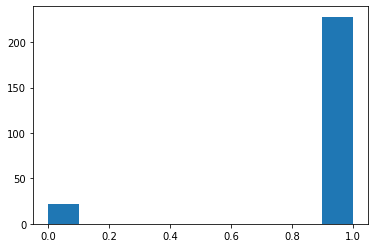

In [83]:
preds_blind = model0.predict(blind_data)
predictions_blind = np.argmax(preds_blind, axis=1)
plt.hist(predictions_blind)
plt.show()

In [84]:
predictions_blind

array([1, 1, 1, 1, ..., 1, 1, 1, 1])

In [85]:
df_blind=pd.concat([df_escuro.iloc[:,0],pd.DataFrame(predictions_blind)],axis=1)
df_blind.columns=['chave','classe']

In [86]:
df_blind.classe[df_blind.classe==1]='Alerta'
df_blind.classe[df_blind.classe==0]='Sem Alerta'
df_blind

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,chave,classe
0,12732_29102019_60350008515_77999946313_Parte1,Alerta
1,12732_19122019_70239512294_34999502456_Parte1,Alerta
2,12732_24122019_69018553549_73998293343_Parte1,Alerta
3,12732_24122019_93803397553_11942165134_Parte1,Alerta
4,12732_12112019_86158412503_19997944778_Parte1,Alerta
...,...,...
245,12732_06122019_53072211850_11968518241_Parte1,Alerta
246,12732_13112019_95097597672_38998562706_Parte1,Alerta
247,12732_24122019_65020880663_37999072469_Parte1,Alerta
248,12732_18122019_69659664915_14998381138_Parte1,Alerta


In [92]:
df_blind.to_csv('Prev_TFBERT_Scratch_0.58_save__.csv',sep=',',index=False,columns=df_blind.columns)

In [88]:
labels22=np.concatenate(train_data.batch(197).make_one_shot_iterator().get_next()[1].numpy(),axis=0)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [89]:
labels22

array([1, 1, 1, 1, ..., 1, 1, 1, 1], dtype=int32)

In [90]:
predictions = np.argmax(preds, axis=1)
predictions=np.array(predictions)
len(predictions)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(labels22,predictions)


array([[ 164,   23],
       [   2, 1391]])

In [91]:
print(classification_report(labels22,predictions,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       187
           1       0.98      1.00      0.99      1393

    accuracy                           0.98      1580
   macro avg       0.99      0.94      0.96      1580
weighted avg       0.98      0.98      0.98      1580



In [96]:
#model0.save_pretrained('./save/')
#pytorch_model = BertForSequenceClassification.from_pretrained('./save/', from_tf=True)

In [97]:



#######################################################################################################################
#! pip3 install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets
from transformers import *
from transformers import BertModel, BertConfig
import tensorflow_hub as hub

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

In [98]:
for i in range(0,df_train.shape[0]):
    if df_train.iloc[i,4]=='[]':
        df_train.iloc[i,4]='vazio'
    else:
        pass

for i in range(0,df_escuro.iloc[:,3].shape[0]):
    if df_escuro.iloc[i,3]=='[]':
        df_escuro.iloc[i,3]='vazio'
    else:
        pass

In [99]:
train3=[]
for i in range(0,df_train.shape[0]):
    try:
        import re
        input_ids = tf.constant(tokenizer.encode(re.sub(r'[^\w\s]','',str(df_train.iloc[i,3]))))[None, 0:512]  # Batch size 1
        outputs = model(input_ids)
        outputs
        last_hidden_states = outputs[0]
        train3.append(np.mean(last_hidden_states,axis=1)[0])
    except:
        train3.append(np.ones(768))

Token indices sequence length is longer than the specified maximum sequence length for this model (3452 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3295 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3956 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3628 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3365 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1184 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1553 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1428 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2514 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1028 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (3001 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3690 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2681 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2132 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (844 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3585 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (611 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1242 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1330 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (2775 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2573 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1890 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1012 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2752 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (816 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (611 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (791 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (3207 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2538 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2886 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3143 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2629 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2089 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1953 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1544 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2911 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1738 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (662 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1248 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (977 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1239 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (1138 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3315 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1431 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2111 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1646 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1241 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1749 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (936 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (834 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (1389 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (772 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1201 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (862 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1288 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1812 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3128 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1181 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2749 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1524 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1852 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1655 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1246 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1919 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2095 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2045 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2007 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1045 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1539 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1475 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1000 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2868 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (853 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3991 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2394 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (2623 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2566 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3042 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1489 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2013 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (3221 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2486 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (766 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1748 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2289 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Token indices sequence length is longer than the specified maximum sequence length for this model (2460 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3079 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2098 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4073 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2659 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2597 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1898 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2402 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1924 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3215 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2110 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4857 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2028 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3885 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2210 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (3510 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2468 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1997 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2741 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4071 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1993 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1912 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2784 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2833 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1381 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2287 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4246 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5988 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3210 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3050 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1731 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3304 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2135 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5866 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3955 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2118 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2589 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2917 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4484 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3103 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1340 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1651 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2397 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2373 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2618 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (3345 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3459 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3066 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2364 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6722 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2419 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2774 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1796 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4032 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4221 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2690 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1815 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2817 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4677 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3735 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2199 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3197 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3118 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2642 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (3080 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2860 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3558 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3697 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2717 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

In [100]:
len(train3[0])

768

In [101]:
train3e=[]
for i in range(0,df_escuro.shape[0]):
    import re
    input_ids = tf.constant(tokenizer.encode(re.sub(r'[^\w\s]','',str(df_escuro.iloc[i,3]))))[None, 0:512]  # Batch size 1
    outputs = model(input_ids)
    outputs
    last_hidden_states = outputs[0]
    train3e.append(np.mean(last_hidden_states,axis=1)[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (4701 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2030 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2131 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4018 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1518 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2780 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2881 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1503 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1367 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1862 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2467 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2950 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1420 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2478 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4035 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (1440 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2232 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1658 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1127 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1363 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (2451 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (680 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2178 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2982 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3960 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

In [102]:
limit=int(df_train.shape[0]*0.8)

In [103]:
x_train=np.array(pd.DataFrame(train3).iloc[0:limit,:])
y_train=np.array(df_train.iloc[0:limit,1].astype(int))
y_train

array([0, 0, 0, 0, ..., 1, 1, 1, 1])

In [104]:
x_test=np.array(pd.DataFrame(train3).iloc[limit:,:])
y_test=np.array(df_train.iloc[limit:,1].astype(int))
y_test

array([1, 1, 1, 1, ..., 1, 1, 1, 1])

In [105]:
x_blind=np.array(pd.DataFrame(train3e))

In [106]:
from sklearn.ensemble import RandomForestClassifier

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,recall_score

def accuracy(params):
    clf = RandomForestClassifier(**params)
    clf.fit(x_train,y_train)
    return clf.score(x_test, y_test)


parameters = {
    'max_depth': hp.choice('max_depth', range(80,120)),
    'max_features': hp.choice('max_features', range(30,x_train.shape[1])),
    'n_estimators': hp.choice('n_estimators', range(30,100)),
    "max_leaf_nodes":hp.choice("max_leaf_nodes",range(2,8)),
    "min_samples_leaf":hp.choice("min_samples_leaf",range(1,30)),
    "min_samples_split":hp.choice("min_samples_split",range(2,100)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}


best = 0
def f(params):
    global best
    acc = accuracy(params)
    if acc > best:
        best = acc
    print ('Improving:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()

In [107]:
best = fmin(f, parameters, algo=tpe.suggest, max_evals=5, trials=trials)
print ('best:',best)

Improving:                                         
0.7514285714285714                                 
{'criterion': 'gini', 'max_depth': 115, 'max_features': 704, 'max_leaf_nodes': 2, 'min_samples_leaf': 26, 'min_samples_split': 91, 'n_estimators': 81}
Improving:                                                                   
0.7514285714285714                                                           
{'criterion': 'entropy', 'max_depth': 102, 'max_features': 414, 'max_leaf_nodes': 7, 'min_samples_leaf': 27, 'min_samples_split': 71, 'n_estimators': 91}
Improving:                                                                   
0.8171428571428572                                                           
{'criterion': 'gini', 'max_depth': 112, 'max_features': 258, 'max_leaf_nodes': 5, 'min_samples_leaf': 16, 'min_samples_split': 88, 'n_estimators': 67}
Improving:                                                                   
0.8171428571428572                                

In [108]:
from xgboost import XGBClassifier

eval_set=[(x_test, y_test)]

model=XGBClassifier(max_depth=80, learning_rate=0.7, n_estimators=30, objective='binary:logistic', 
                    booster='gbtree', n_jobs=64,eval_metric="error",min_child_weight=0.1,max_delta_step=0.5,
                   gamma=0.5)
clf=model.fit(x_train,y_train,eval_set=eval_set,verbose=True)#,early_stopping_rounds=3)
print('Score',clf.score(x_test,y_test))

[0]	validation_0-error:0.197143
[1]	validation_0-error:0.222857
[2]	validation_0-error:0.205714
[3]	validation_0-error:0.214286
[4]	validation_0-error:0.202857
[5]	validation_0-error:0.202857
[6]	validation_0-error:0.188571
[7]	validation_0-error:0.185714
[8]	validation_0-error:0.182857
[9]	validation_0-error:0.168571
[10]	validation_0-error:0.168571
[11]	validation_0-error:0.168571
[12]	validation_0-error:0.165714
[13]	validation_0-error:0.168571
[14]	validation_0-error:0.171429
[15]	validation_0-error:0.168571
[16]	validation_0-error:0.168571
[17]	validation_0-error:0.162857
[18]	validation_0-error:0.162857
[19]	validation_0-error:0.174286
[20]	validation_0-error:0.165714
[21]	validation_0-error:0.165714
[22]	validation_0-error:0.165714
[23]	validation_0-error:0.171429
[24]	validation_0-error:0.171429
[25]	validation_0-error:0.171429
[26]	validation_0-error:0.171429
[27]	validation_0-error:0.171429
[28]	validation_0-error:0.171429
[29]	validation_0-error:0.171429
Score 0.828571428571

(array([ 13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 237.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

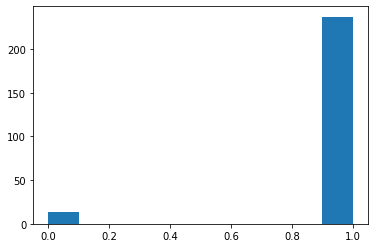

In [109]:
plt.hist(model.predict(x_blind))

In [110]:
ssd=pd.concat([df_escuro.iloc[:,0],pd.DataFrame(model.predict(x_blind))],axis=1)
ssd.columns=['chave','classe']
ssd.to_csv('boosting.csv',sep=',',index=False,columns=ssd.columns)